### Importing Libraries

In [43]:
import librosa
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [44]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)  # Should be 2.10 or above
print("GPUs:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')



TensorFlow version: 2.16.2
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Visualizing Single Audio

In [45]:
random_file_name = "genres_original/blues/blues.00001.wav"

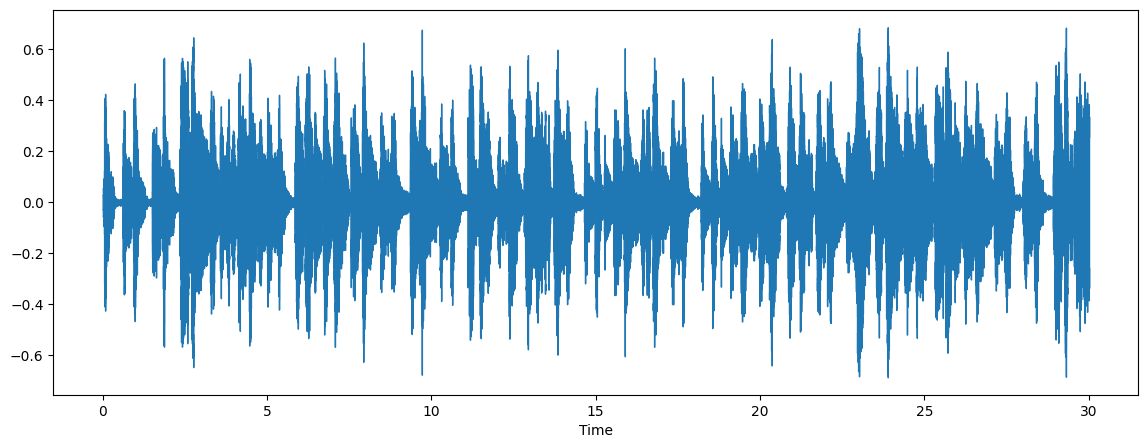

In [46]:
y , sr = librosa.load(random_file_name, sr = 44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [47]:
# Plotting Melspectogram for entire audio
def plot_melspectogram(y, sr):
    # Compute Spectogram
    spectogram = librosa.feature.melspectrogram(y=y,sr=sr)
    # Convert to decibles (log scale)
    spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
    # Visualize the Spectogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectogram_db, sr=sr,x_axis='time', y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectogram")
    plt.tight_layout()
    plt.show()

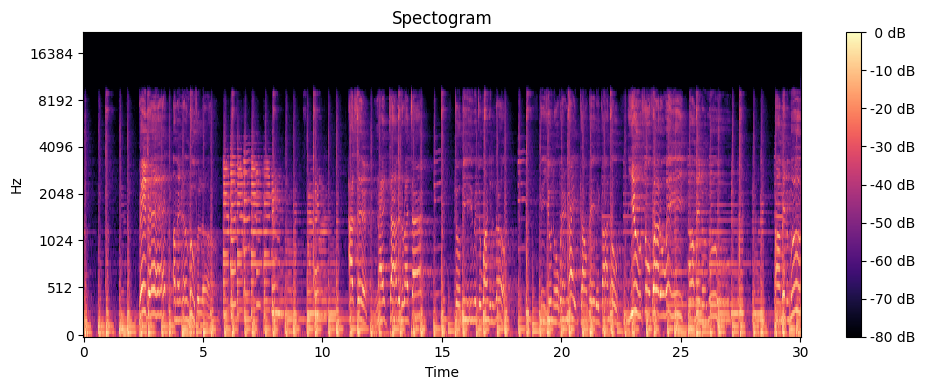

In [48]:
plot_melspectogram(y, sr)

### Playing Sound

In [49]:
from IPython.display import Audio
Audio(data= y, rate= sr)

### Doing Visualization on Chunks of Audio

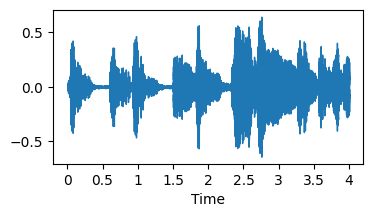

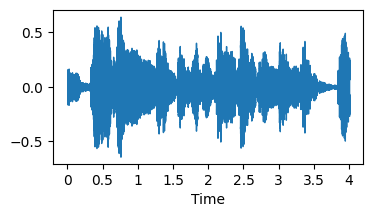

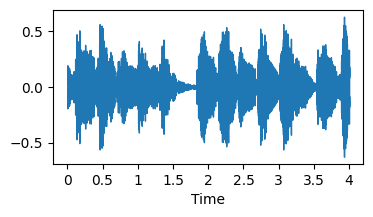

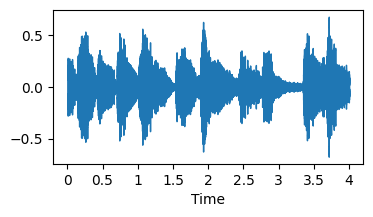

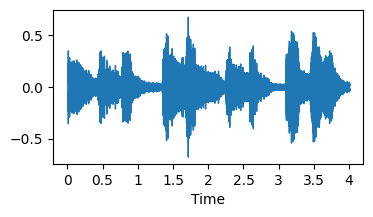

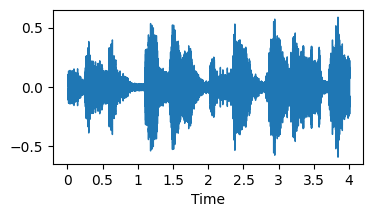

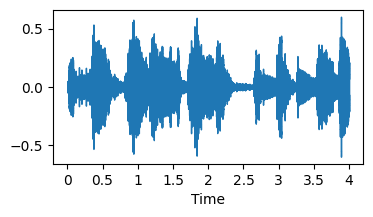

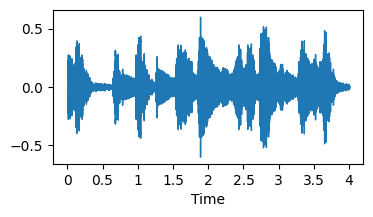

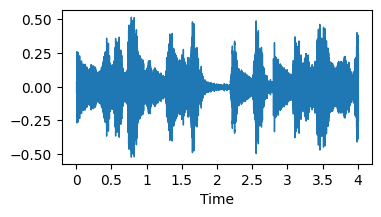

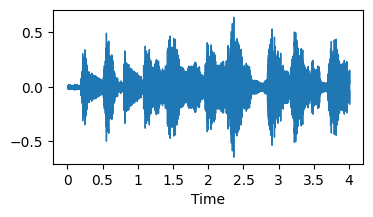

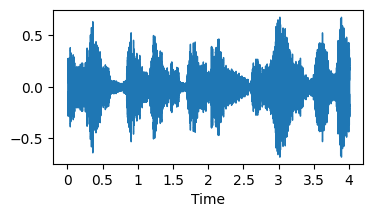

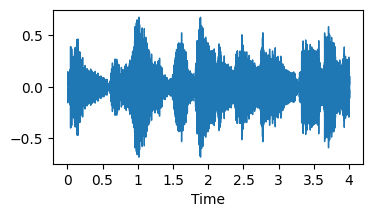

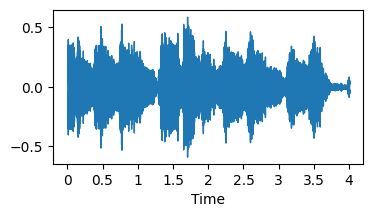

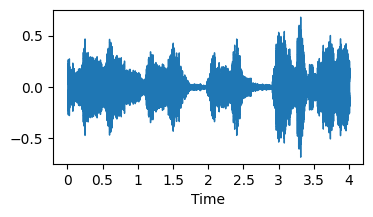

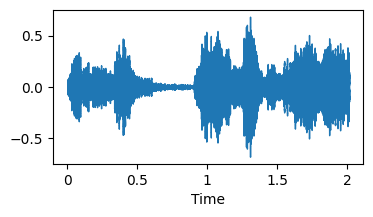

In [50]:
audio_path = "genres_original/blues/blues.00001.wav"
y, sr = librosa.load(audio_path, sr = None) # sr = None -> to keep original sampling rate

# define the duration of each chunk and overlap
chunk_duration = 4  # in seconds
overlap_duration = 2  # in seconds
#print("y: ", len(y))
# Convert Duration to sample
chunk_samples = chunk_duration*sr
#print("chunk_samples: ", chunk_samples)
overlap_samples = overlap_duration*sr
#print("overlap_samples: ", overlap_samples)

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
#print("num_chunks: ", num_chunks)

# iterate over each chunks
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i*(chunk_samples-overlap_samples)
    end = min(start+chunk_samples, len(y))
    #end = start+chunk_samples
    # Extract the chunk from the audio signal
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

In [51]:
def plot_melspectogram_chunks(y,sr):
    # define the duration of each chunk and overlap
    chunk_duration = 4  # in seconds
    overlap_duration = 2  # in seconds
    # Convert Duration to sample
    chunk_samples = chunk_duration*sr
    overlap_samples = overlap_duration*sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

    # iterate over each chunks
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = min(start+chunk_samples, len(y))
        #end = start+chunk_samples
        # Extract the chunk from the audio signal
        chunk = y[start:end]
        # melspectogram part
        melspectogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        # Convert to decibles (log scale)
        spectogram_db = librosa.power_to_db(melspectogram, ref=np.max)
        # Visualize the spectogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectogram_db, sr=sr,x_axis='time', y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectogram")
        plt.tight_layout()
        plt.show()
        

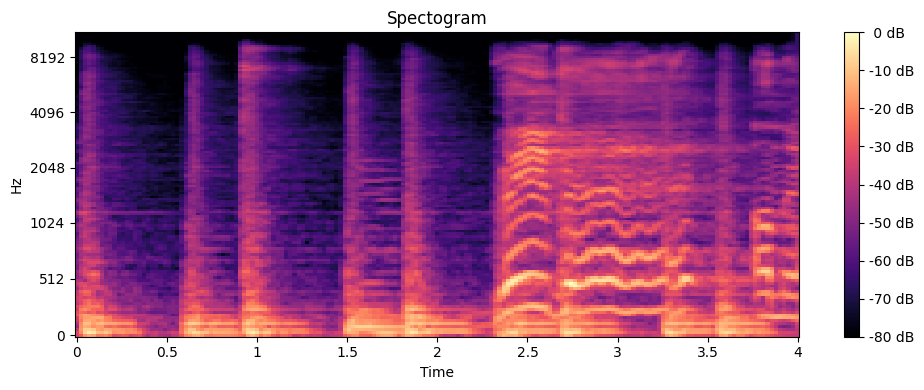

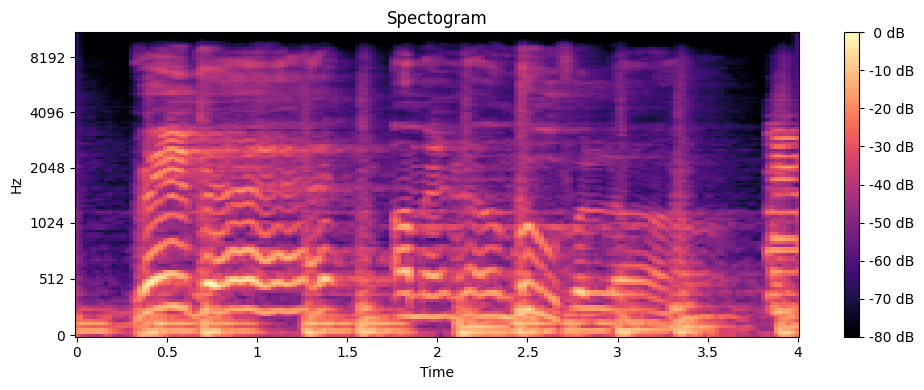

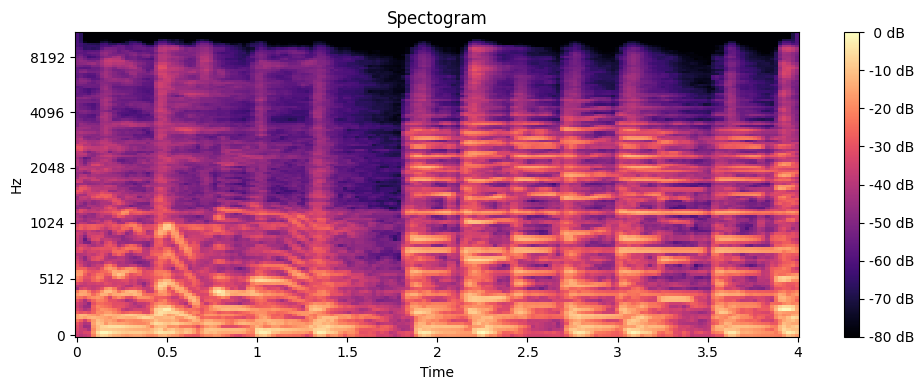

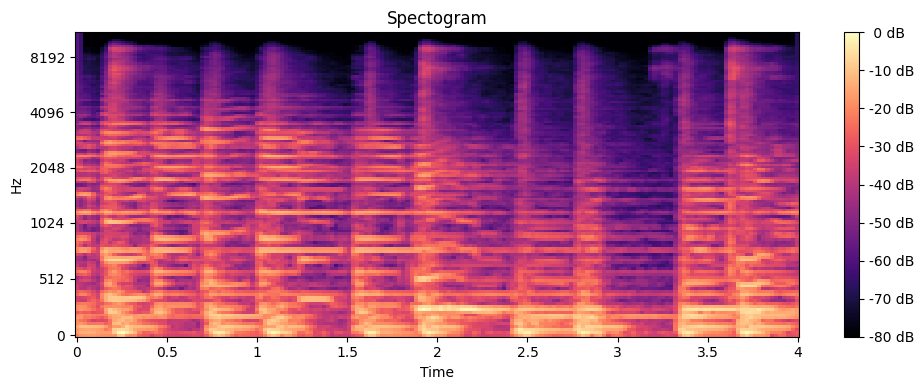

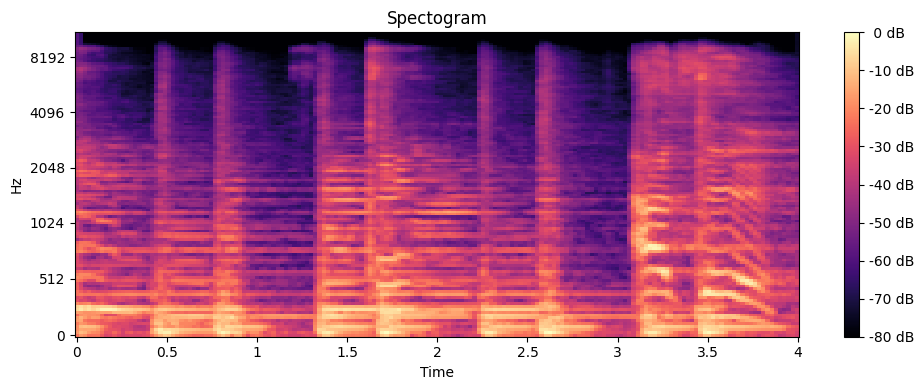

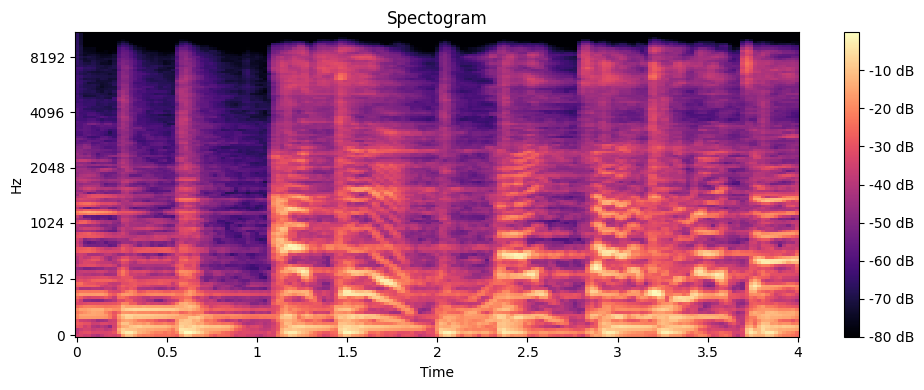

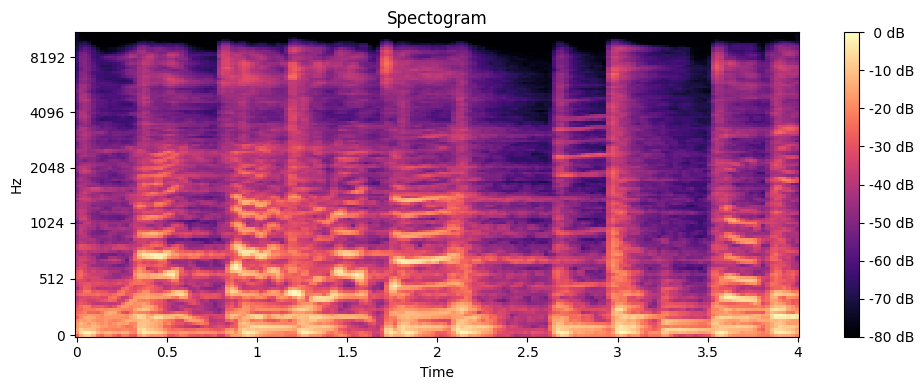

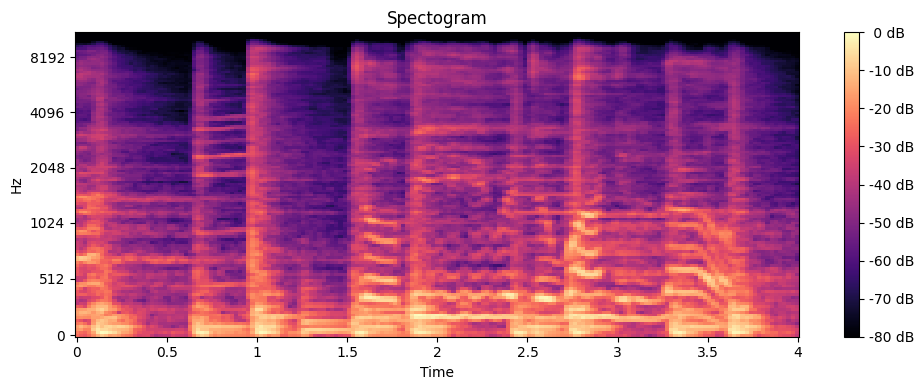

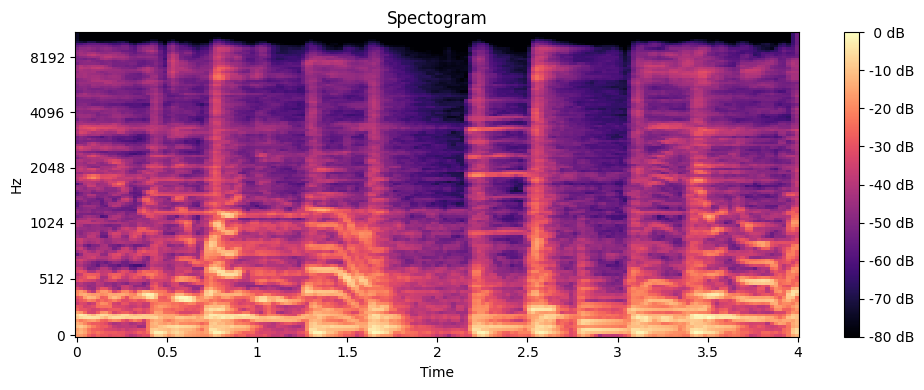

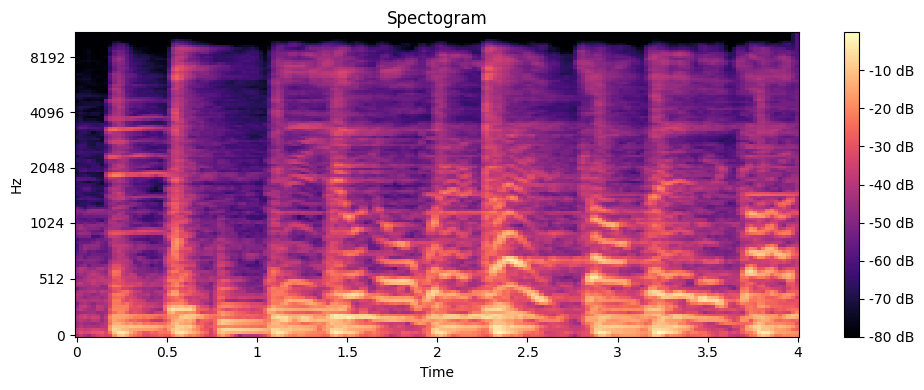

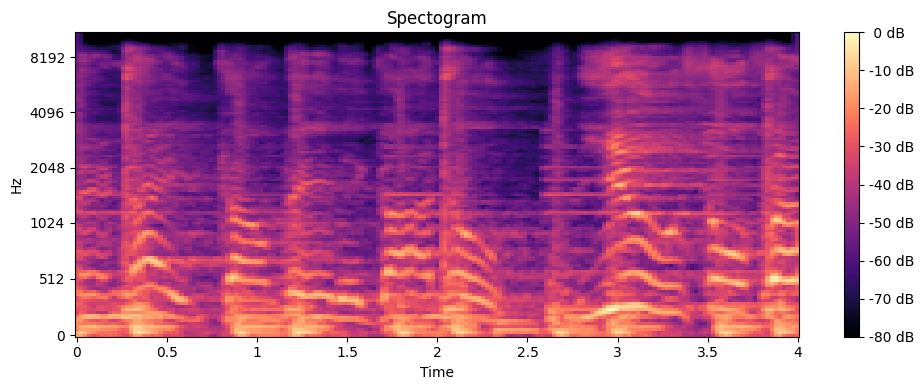

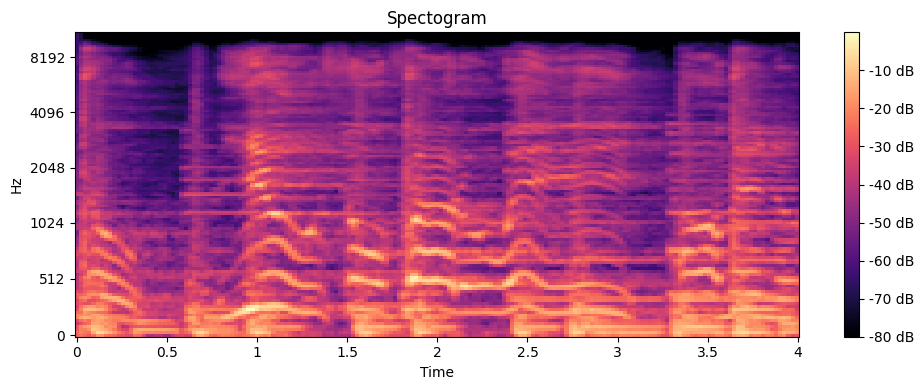

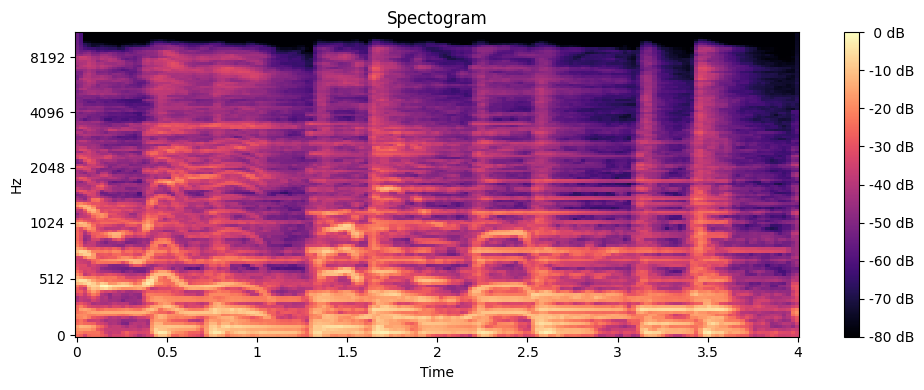

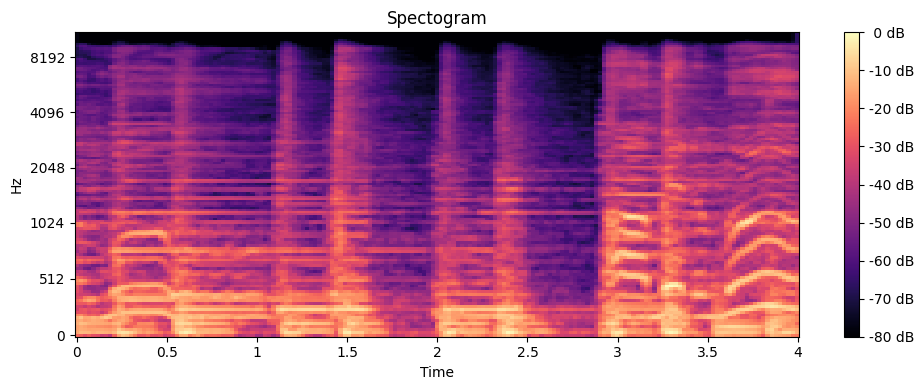

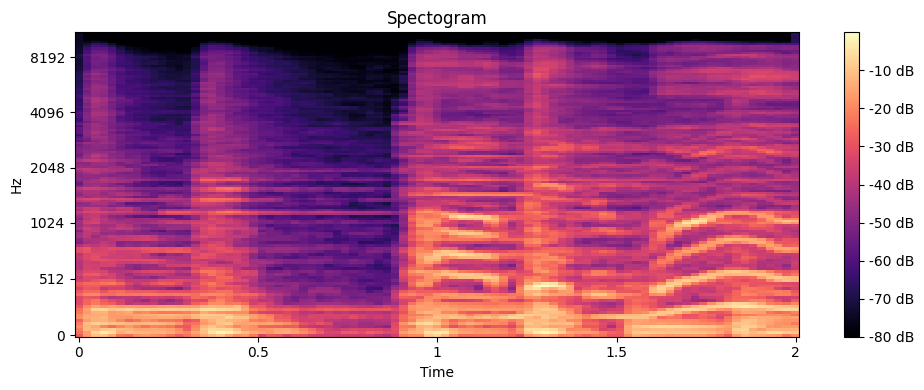

In [52]:
plot_melspectogram_chunks(y,sr)

### Data preprocessing - Final

In [53]:
# define your folder structure
data_dir = "./genres_original"
classes =['blues',  'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [54]:
"""
from tensorflow.image import resize

# Load and preprocess Audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(210,210)):
    data = []
    labels = []
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("--Processing--", class_name)
        for file in os.listdir(class_dir):
            if file.endswith('.wav'):
                file_path = os.path.join(class_dir, file)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform Preprocessing
                # define the duration of each chunk and overlap
                chunk_duration = 4  # in seconds
                overlap_duration = 2  # in seconds
                # Convert Duration to sample
                chunk_samples = chunk_duration*sample_rate
                overlap_samples = overlap_duration*sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1

                # iterate over each chunks
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = min(start+chunk_samples, len(audio_data))
                    #end = start+chunk_samples
                    # Extract the chunk from the audio signal
                    chunk = audio_data[start:end]
                    # melspectogram part
                    mel_spectogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    # Resize matrix based on provided target shape
                    mel_spectogram = resize(np.expand_dims(mel_spectogram, axis=-1),target_shape)
                    # Append data to list
                    data.append(mel_spectogram)
    # Return
    return np.array(data), np.array(labels)         "
"""

'\nfrom tensorflow.image import resize\n\n# Load and preprocess Audio data\ndef load_and_preprocess_data(data_dir, classes, target_shape=(210,210)):\n    data = []\n    labels = []\n    for i, class_name in enumerate(classes):\n        class_dir = os.path.join(data_dir, class_name)\n        print("--Processing--", class_name)\n        for file in os.listdir(class_dir):\n            if file.endswith(\'.wav\'):\n                file_path = os.path.join(class_dir, file)\n                audio_data, sample_rate = librosa.load(file_path, sr=None)\n                # Perform Preprocessing\n                # define the duration of each chunk and overlap\n                chunk_duration = 4  # in seconds\n                overlap_duration = 2  # in seconds\n                # Convert Duration to sample\n                chunk_samples = chunk_duration*sample_rate\n                overlap_samples = overlap_duration*sample_rate\n\n                # Calculate the number of chunks\n                num_c

In [55]:
from tensorflow.image import resize

def load_and_preprocess_data(data_dir, classes, target_shape=(150,150)):
    data = []
    labels = []
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("--Processing--", class_name)
        for file in os.listdir(class_dir):
            if file.endswith('.wav'):
                file_path = os.path.join(class_dir, file)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)

                    # define the duration of each chunk and overlap
                    chunk_duration = 4  # seconds
                    overlap_duration = 2  # seconds
                    chunk_samples = int(chunk_duration * sample_rate)
                    overlap_samples = int(overlap_duration * sample_rate)

                    # Calculate the number of chunks
                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                    for j in range(num_chunks):
                        start = j * (chunk_samples - overlap_samples)
                        end = min(start + chunk_samples, len(audio_data))

                        chunk = audio_data[start:end]

                        # Pad chunk if it's smaller than chunk_samples
                        if len(chunk) < chunk_samples:
                            chunk = np.pad(chunk, (0, chunk_samples - len(chunk)))

                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                        mel_spectrogram = np.expand_dims(mel_spectrogram, axis=-1)

                        mel_spectrogram_resized = resize(mel_spectrogram, target_shape)

                        data.append(mel_spectrogram_resized)
                        labels.append(i)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    return np.array(data), np.array(labels)

In [56]:
data, labels = load_and_preprocess_data(data_dir, classes)

--Processing-- blues
--Processing-- classical
--Processing-- country
--Processing-- disco
--Processing-- hiphop
--Processing-- jazz
--Processing-- metal
--Processing-- pop
--Processing-- reggae
--Processing-- rock


In [57]:
data.shape

(14975, 150, 150, 1)

In [58]:
labels.shape

(14975,)

In [59]:
# Converting labels to one hot encoding
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes = len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
labels.shape

(14975, 10)

### Splitting of Dataset into Traing and Test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Building Model

In [62]:
model = tf.keras.models.Sequential()

In [63]:
X_train.shape

(11980, 150, 150, 1)

In [64]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [65]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [66]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [67]:
model.add(Dropout(0.3))

In [68]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [69]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [70]:
model.add(Dropout(0.3))

In [71]:
model.add(Flatten())

In [72]:
model.add(Dense(units=1200,activation='relu'))

In [73]:
model.add(Dropout(0.45))

In [74]:
# Output Layer
model.add(Dense(units=len(classes), activation='softmax'))

Sigmoid activation -> classification but 2 classes

Softmax activation -> classification but multiple classes

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 73, 73, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 36, 36, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,108,666 (27.12 MB)

 Trainable params: 7,108,666 (27.12 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# Training Model
training_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 155ms/step - accuracy: 0.1822 - loss: 2.2239 - val_accuracy: 0.4270 - val_loss: 1.6705
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 141ms/step - accuracy: 0.4214 - loss: 1.6471 - val_accuracy: 0.5319 - val_loss: 1.3663
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 141ms/step - accuracy: 0.5391 - loss: 1.3427 - val_accuracy: 0.6100 - val_loss: 1.1586
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.6216 - loss: 1.1433 - val_accuracy: 0.6835 - val_loss: 0.9443
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 140ms/step - accuracy: 0.6618 - loss: 0.9846 - val_accuracy: 0.7269 - val_loss: 0.8224
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step - accuracy: 0.7241 - loss: 0.8330 - val_accuracy: 0.7492 - val_loss: 0.7860
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.7445 - loss: 0.7532 - val_accuracy: 0.7823 - val_loss: 0.6818
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 136ms/step - accuracy: 0.7911 - loss: 0

In [78]:
model.save("Trained_model.keras")

In [79]:
# Recording history in JSON
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [80]:
# Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 73, 73, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 36, 36, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,326,004 (81.35 MB)

 Trainable params: 7,108,666 (27.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,217,338 (54.23 MB)

In [81]:
# Reloading Training History
import json
with open("training_hist.json", 'r') as json_file:
    training_history_data = json.load(json_file)

In [82]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Model Evaluation

In [83]:
# Model Evaluation on Training Set
train_loss, train_accuracy = model.evaluate(X_train, Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9941 - loss: 0.0228


In [84]:
# Model Evaluation on Validation Set
val_loss, val_accuracy = model.evaluate(X_test, Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9013 - loss: 0.4595


### Accuracy and Loss Visualization - Model Evaluation I

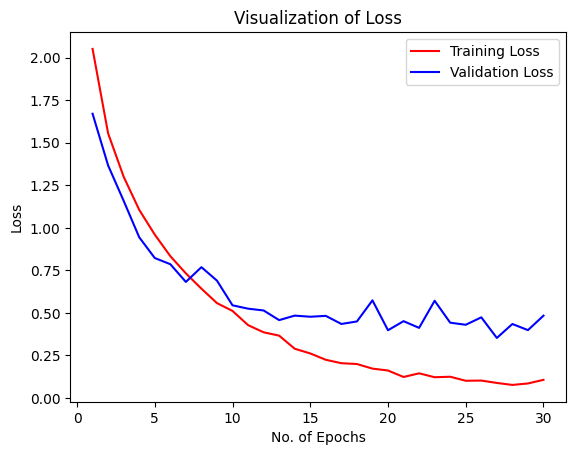

In [85]:
# Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history_data['loss'], label="Training Loss", color='red')
plt.plot(epochs, training_history_data['val_loss'], label="Validation Loss", color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()
plt.show()

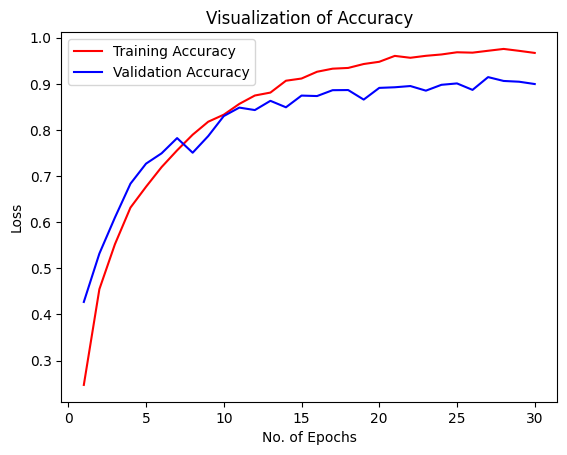

In [86]:
# Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history_data['accuracy'], label="Training Accuracy", color='red')
plt.plot(epochs, training_history_data['val_accuracy'], label="Validation Accuracy", color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()

### Precision, Recall and Confusion Matrix - Model Evaluation II

In [87]:
y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [88]:
y_pred

array([[7.886e-05, 0.000e+00, 1.112e-04, ..., 6.555e-02, 2.337e-04,
        9.336e-01],
       [4.113e-06, 0.000e+00, 3.843e-04, ..., 1.311e-06, 0.000e+00,
        3.792e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        4.341e-01],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.311e-06, 1.000e+00, 8.345e-07, ..., 7.153e-06, 1.490e-06,
        9.537e-07],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float16)

In [89]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([9, 6, 6, ..., 0, 1, 4])

In [90]:
true_categories = np.argmax(Y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories, predicted_categories)
# Precision, recall, F1 Score
print(classification_report(true_categories, predicted_categories, target_names=classes))

              precision    recall  f1-score   support

       blues       0.89      0.92      0.91       302
   classical       0.91      0.97      0.94       298
     country       0.89      0.83      0.86       317
       disco       0.96      0.91      0.94       312
      hiphop       0.86      0.97      0.92       277
        jazz       0.92      0.87      0.89       311
       metal       0.93      0.95      0.94       302
         pop       0.90      0.89      0.89       289
      reggae       0.96      0.83      0.89       296
        rock       0.79      0.85      0.82       291

    accuracy                           0.90      2995
   macro avg       0.90      0.90      0.90      2995
weighted avg       0.90      0.90      0.90      2995



In [92]:
cm

array([[279,   0,   6,   2,   1,   4,   0,   0,   1,   9],
       [  1, 289,   1,   0,   0,   7,   0,   0,   0,   0],
       [ 14,   2, 262,   2,   0,   8,   1,   6,   3,  19],
       [  0,   1,   2, 284,   3,   0,   2,   7,   3,  10],
       [  1,   1,   0,   0, 270,   0,   0,   3,   0,   2],
       [  9,  18,   4,   1,   1, 272,   2,   0,   1,   3],
       [  0,   0,   0,   0,   3,   0, 286,   1,   0,  12],
       [  1,   3,   2,   0,  17,   1,   0, 258,   0,   7],
       [  7,   3,   8,   3,  14,   2,   0,   8, 247,   4],
       [  1,   1,  10,   3,   4,   3,  16,   5,   1, 247]])

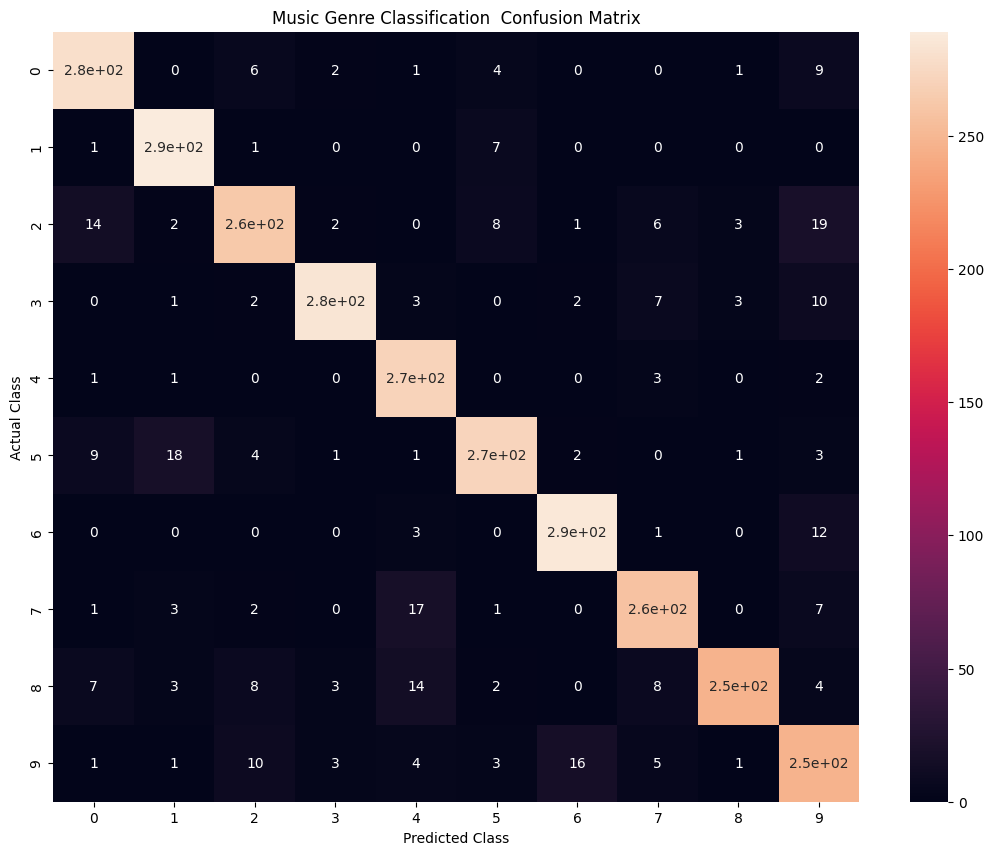

In [93]:
import seaborn as sns
plt.figure(figsize=(13,10))
sns.heatmap(cm, annot=True, annot_kws={"size":10})
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Music Genre Classification  Confusion Matrix")
plt.show()